--- Descriptive Statistics ---
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min 

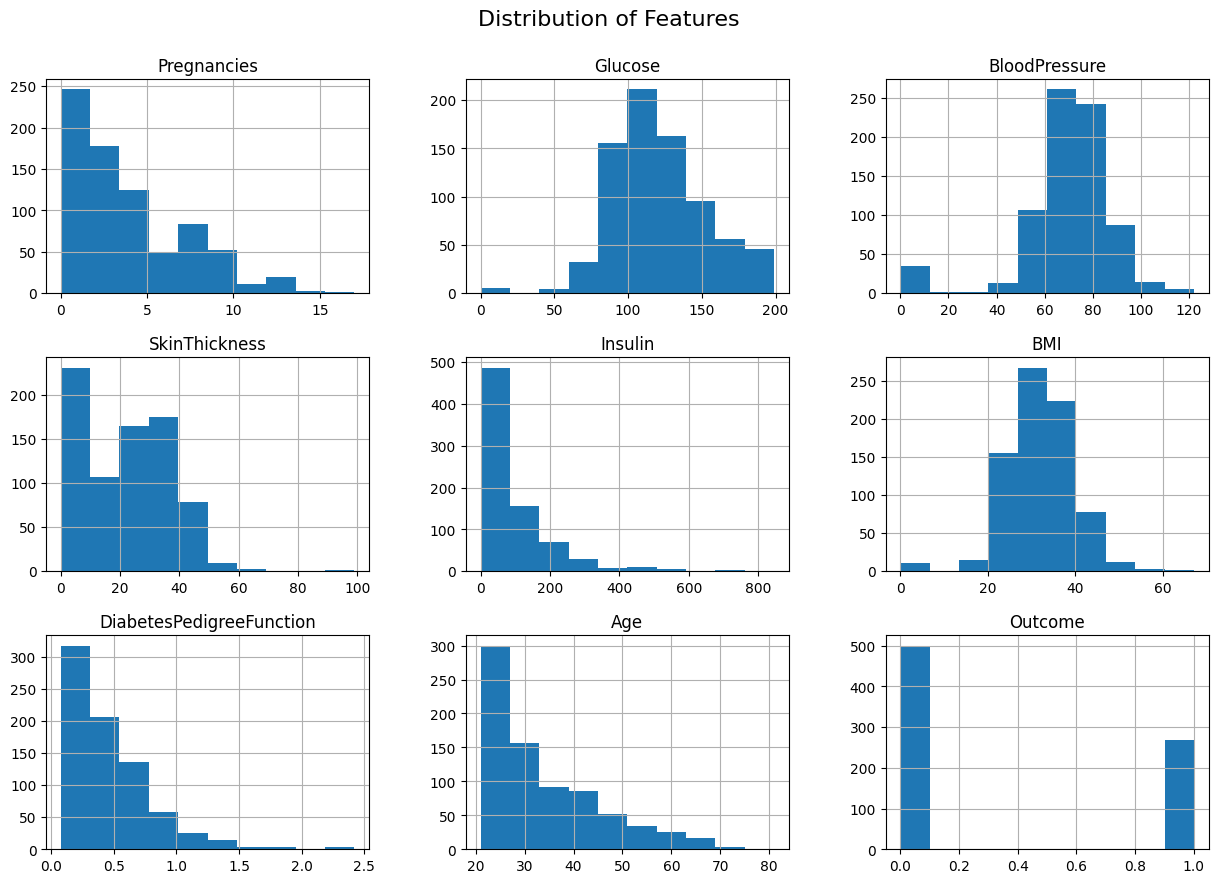

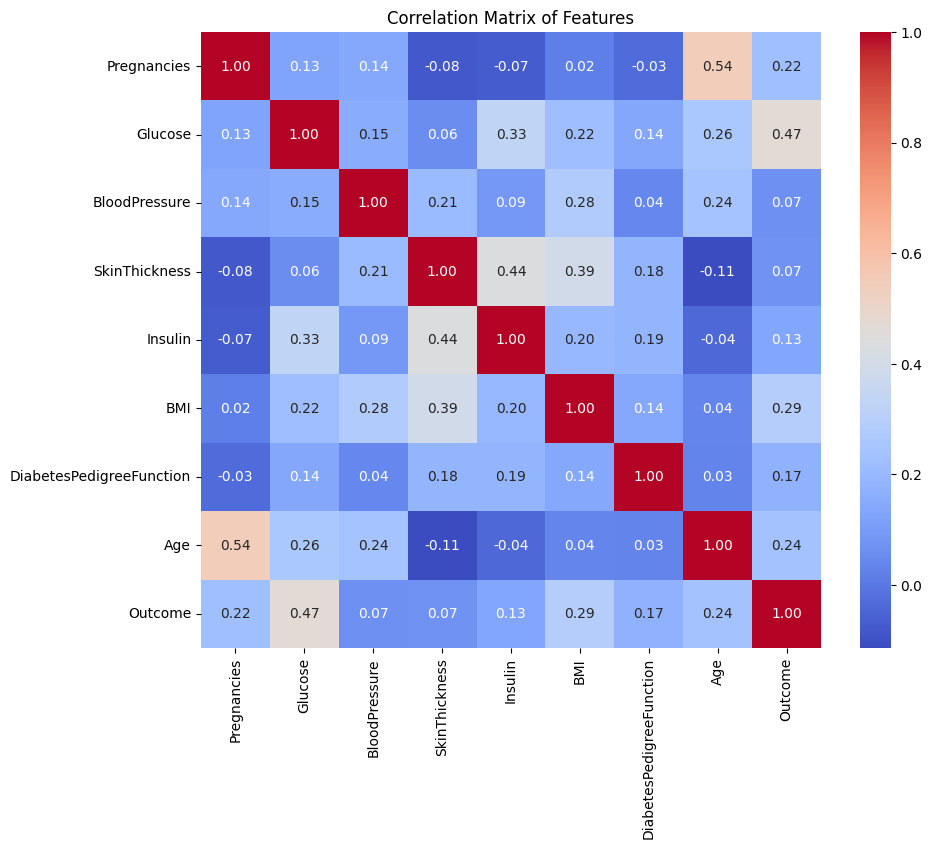

In [3]:
# Necessary imports for EDA and visualization
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("diabetes.csv")

#  Descriptive Statistics
print("--- Descriptive Statistics ---")
print(df.describe())
print("\n")

#  Distribution Plots for each feature
# This will help you see the distribution of each variable.
df.hist(figsize=(15, 10))
plt.suptitle('Distribution of Features', y=0.95, fontsize=16)
plt.show()

#  Correlation Heatmap
# This shows the correlation between all features and the 'Outcome'.
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load the dataset (if not already loaded)
df = pd.read_csv("diabetes.csv")

# Identify columns with potentially missing values represented as '0'
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace '0' with NaN to handle them properly
df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)

# Correctly impute missing values with the median of each column
# The median is less sensitive to outliers than the mean.
for col in cols_with_zeros:
    # This line is the corrected version that resolves the FutureWarning
    df[col] = df[col].fillna(df[col].median())

# Define X and Y after preprocessing
Y = df['Outcome']
X = df.drop(['Outcome'], axis='columns')

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




In [ ]:
import pandas as pd
import numpy as np


df = pd.read_csv("diabetes.csv")
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)
for col in cols_with_zeros:
    df[col] = df[col].fillna(df[col].median())

# Print the first 5 rows to see the imputed values
print("Head of DataFrame after imputation:")
print(df.head())

# Print the info to confirm there are no null values
print("\nInfo of DataFrame after imputation:")
df.info()

Head of DataFrame after imputation:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    125.0  33.6   
1            1     85.0           66.0           29.0    125.0  26.6   
2            8    183.0           64.0           29.0    125.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Info of DataFrame after imputation:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


Y = df['Outcome']
X = df.drop(['Outcome'], axis='columns')

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Print the first 5 rows of the scaled training data
print("Head of Scaled Training Data:")
print(X_train_scaled[:5])

# Print the first 5 rows of the scaled testing data
print("\nHead of Scaled Testing Data:")
print(X_test_scaled[:5])

Head of Scaled Training Data:
[[ 3.54838018e-01 -4.24670856e-01 -4.07708340e-04  1.54802337e+00
  -7.84246906e-01  5.03915225e-01 -6.17869511e-01  1.06408522e-02]
 [-5.47940475e-01 -6.21958047e-01  1.16781259e+00  7.65730077e-01
  -2.21129910e-01  1.85364472e+00 -1.03457650e+00 -8.60490246e-01]
 [ 5.39118536e-02  1.21938908e+00  5.00258133e-01 -1.65632130e-02
  -1.58561355e-01  4.44328442e-02  1.03670235e+00 -1.63585367e-01]
 [-2.47014311e-01 -2.93146061e-01  1.66480906e-01  9.51929713e-02
  -1.58561355e-01 -1.42231873e-01 -8.20094961e-01 -6.86264026e-01]
 [-8.48866640e-01  3.56659256e-02 -6.67962164e-01  3.18705340e-01
   2.29363687e-01  3.60326981e-01  6.96595913e-01 -2.50698477e-01]]

Head of Scaled Testing Data:
[[-0.84886664 -1.01653243 -0.83485078 -1.91641835 -1.18468566 -0.77402015
   0.35342545 -0.77337714]
 [ 0.95669035  1.97565665  1.00092397 -0.91061269  0.67985728  0.47519758
   0.37180958  1.57867683]
 [ 2.76224733  1.02210189  1.50158982  0.43046152 -1.35987761 -0.8314554

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# It's recommended to use scaled data for Logistic Regression, SVM, and KNN.

#  Logistic Regression
Lr = LogisticRegression(random_state=7, solver='liblinear')
Lr.fit(X_train_scaled, Y_train)
print(f"Logistic Regression Test Accuracy: {Lr.score(X_test_scaled, Y_test):.4f}")

#  Decision Tree
# Decision trees are not sensitive to feature scaling, so we can use the unscaled data.
dt_clf = DecisionTreeClassifier(random_state=7)
dt_clf.fit(X_train, Y_train)
print(f"Decision Tree Test Accuracy: {dt_clf.score(X_test, Y_test):.4f}")

#  Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=7)
rf_clf.fit(X_train, Y_train)
print(f"Random Forest Test Accuracy: {rf_clf.score(X_test, Y_test):.4f}")

# . Support Vector Machine (SVM)
svm_clf = SVC(random_state=7)
svm_clf.fit(X_train_scaled, Y_train)
print(f"SVM Test Accuracy: {svm_clf.score(X_test_scaled, Y_test):.4f}")

Logistic Regression Test Accuracy: 0.7727
Decision Tree Test Accuracy: 0.7727
Random Forest Test Accuracy: 0.8117
SVM Test Accuracy: 0.8182


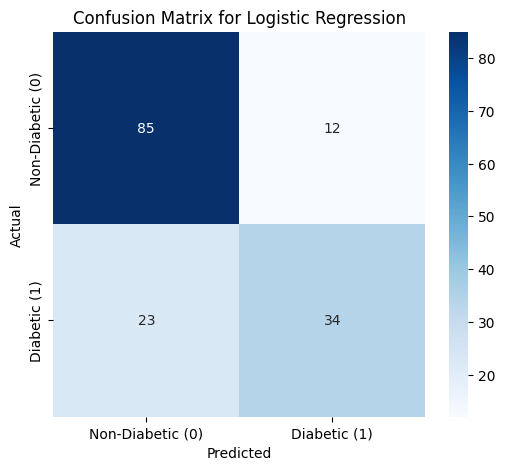

--- Classification Report for Logistic Regression ---
              precision    recall  f1-score   support

           0       0.79      0.88      0.83        97
           1       0.74      0.60      0.66        57

    accuracy                           0.77       154
   macro avg       0.76      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154



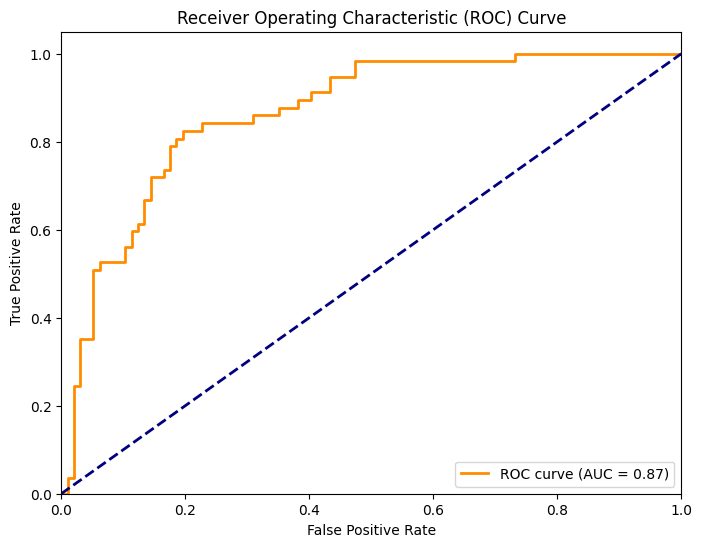

In [12]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns


Y_pred_log_reg = Lr.predict(X_test_scaled)
Y_proba_log_reg = Lr.predict_proba(X_test_scaled)[:, 1] # Probability for the positive class (1)

#  Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred_log_reg)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Diabetic (0)', 'Diabetic (1)'],
            yticklabels=['Non-Diabetic (0)', 'Diabetic (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

#  Classification Report
# Provides Precision, Recall, and F1-Score for each class.
print("--- Classification Report for Logistic Regression ---")
print(classification_report(Y_test, Y_pred_log_reg))

#  ROC Curve and AUC Score
# The AUC score (Area Under the Curve) measures the model's ability to distinguish between classes.
# A higher AUC is better, with 1.0 being a perfect model.
fpr, tpr, thresholds = roc_curve(Y_test, Y_proba_log_reg)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Re-define X and Y and split the data
df = pd.read_csv("diabetes.csv")
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)
for col in cols_with_zeros:
    df[col].fillna(df[col].median(), inplace=True)
Y = df['Outcome']
X = df.drop(['Outcome'], axis='columns')
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

# Create a pipeline for preprocessing and model training
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(random_state=7))
])

# Define the hyperparameters to search
param_grid = {
    'model__C': [0.01, 0.1, 1, 10, 100],  # C is the inverse of regularization strength
    'model__solver': ['liblinear', 'lbfgs'] 
}

# Perform Grid Search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, Y_train)


print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.4f}".format(grid_search.best_score_))


best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, Y_test)
print("Test accuracy of the best model: {:.4f}".format(test_accuracy))

C:\Users\B RAHUL\AppData\Local\Temp\ipykernel_2924\1508529136.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\B RAHUL\AppData\Local\Temp\ipykernel_2924\1508529136.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found:  {'model__C': 0.1, 'model__solver': 'liblinear'}
Best cross-validation accuracy: 0.7655
Test accuracy of the best model: 0.7727
